
<h1><center> Assignment1 </center></h1>

<h3><center> Student Number : 1002572236</center></h3>

<h3><center> Name: Redko Danil </center></h3>

__[2 points]__ Write your own code for computing convolution of the 2D (grayscale)
image and a 2D filter. Make the output matrix be the same size as the input
image. Be careful to correctly deal with the border of the image - the easiest
way to do this is to "zero-pad" the image prior to correlation.

In [1]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndimage
%matplotlib inline  
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cv2

In [2]:
def get_submatrix(i, j, a, index, filter_size):
    
    p1 = a[index-j-1:index-j-1+filter_size]
    p2 = a[index-1:index-1+filter_size]
    p3 = a[index+j-1:index+j-1+filter_size]
    matrix = np.array([p1,p2,p3])
    return matrix.flatten()

In [3]:
def add_zeros_along_axis(pic):
    
    pic = np.insert(pic, [0], 0, axis=1)
    pic = np.insert(pic, [0], 0, axis=0)
    pic = np.insert(pic, pic.shape[1], 0, axis=1)
    pic = np.insert(pic, pic.shape[0], 0, axis=0)
    
    return pic 

In [4]:
def flip_filter(filter):
    
    filter = np.flip(filter, axis=1)
    filter = np.flip(filter, axis=0)
    
    return filter

Since using nested loop is inefficient and slow, we'll convert all the matrices into the (x,1) matrix.

In [5]:
def my_correlate_or_convolve(filter, pic, mode='correlate'):
    
    if mode=='convole':
        filter = flip_filter(filter)
    
    filter_size = filter.shape[0]
    filter = filter.flatten()
    i, j = pic.shape
    
    pic = add_zeros_along_axis(pic)    
    width_with_zeros = pic.shape[1]
    height_with_zeros = pic.shape[0]
    pic = pic.flatten()
    final = []
    
    for index in range(width_with_zeros+1, pic.flatten().shape[0]-width_with_zeros-1):
        
        if (index+1)%width_with_zeros==0 or index%width_with_zeros==0:
            index+=2
        else:
            item = np.dot(get_submatrix(height_with_zeros, width_with_zeros, pic, index, filter_size), filter)
            final.append(item)        

    return np.array(final).reshape(i,j)

Let's load an image, and try the function.

In [6]:
waldo = cv2.imread('waldo.png', 0)

In [7]:
waldo.shape

(655, 960)

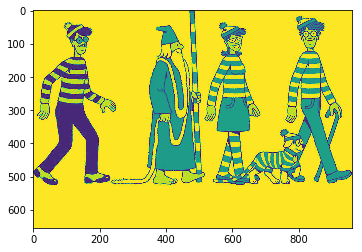

In [8]:
plt.imshow(waldo)
plt.show()

Set a filter for __convolution__:

In [9]:
filter = np.array([[1,1,1],[1,1,0],[1,0,0]])

Let's check if _ndimage_ return the same result as the function implemented above:

In [10]:
image1 = ndimage.filters.correlate(waldo, filter, mode='constant')
image1

array([[255, 253, 253, ..., 253, 253, 253],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       ...,
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 251, 251, ..., 251, 251, 252]], dtype=uint8)

Since we want to return a valid image, we should limit our values 0-255:

In [11]:
image2 = np.mod(my_correlate_or_convolve(filter, waldo, mode='convolve'), 256)
image2

array([[255, 253, 253, ..., 253, 253, 253],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       ...,
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 251, 251, ..., 251, 251, 252]])

The matrices are indeed the same.

In [12]:
np.array_equal(image1, image2)

True

Since by the question we are not reqired to get a valid matrix, let's demonstrate how convolution works.

In [13]:
my_correlate_or_convolve(filter, waldo, mode='convolve')

array([[ 255,  765,  765, ...,  765,  765,  765],
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       ...,
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       [ 765, 1275, 1275, ..., 1275, 1275, 1020]])

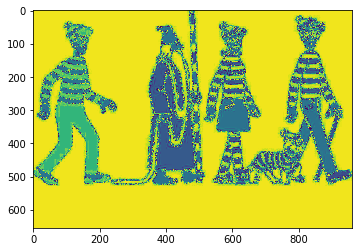

In [14]:
plt.imshow(image1)
plt.show()

__[1 point]__ Extend this code to handle RGB images and 3D filters (having
the third dimension equal to 3).